https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python


Imports Basic

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy import signal


# fix random seed for reproducibility
tf.random.set_seed(7)

In [3]:
D = pd.read_excel('Df.xlsx', index_col=0)
D 

,f,Zc,pbh,pwh,q,fq,Zc.1,Pin,H,P,I,qc,5
0,49.500000,51.000000,8.327778e+06,2.971014e+06,0.009815,49.500000,51.000000,6.041048e+06,581.350778,86783.661860,34.793062,0.009971,0.009938
1,49.000000,52.000000,8.369883e+06,2.926701e+06,0.009696,49.000000,52.000000,6.087415e+06,569.755765,84258.302671,33.529246,0.009965,0.009813
2,48.500000,53.000000,8.411166e+06,2.877555e+06,0.009612,48.500000,53.000000,6.169829e+06,557.620569,81858.882322,32.558992,0.009906,0.009713
3,48.000000,54.000000,8.449419e+06,2.829281e+06,0.009527,48.000000,54.000000,6.166428e+06,545.381614,79370.812167,31.623990,0.009805,0.009646
4,47.500000,55.000000,8.487239e+06,2.782872e+06,0.009439,47.500000,55.000000,6.218466e+06,532.565346,77236.573452,30.553358,0.009772,0.009609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,52.623409,91.681448,7.703893e+06,2.383756e+06,0.011359,52.623409,91.681448,5.284879e+06,635.981141,105957.542757,42.609344,0.011317,0.011384
15996,52.623409,91.681448,7.703893e+06,2.383756e+06,0.011359,52.623409,91.681448,5.307680e+06,633.935653,106267.104673,42.482301,0.011360,0.011314
15997,52.623409,91.681448,7.703893e+06,2.383756e+06,0.011359,52.623409,91.681448,5.270534e+06,633.563449,106532.843006,42.747149,0.011372,0.011344
15998,52.623409,91.681448,7.703893e+06,2.383756e+06,0.011359,52.623409,91.681448,5.273390e+06,632.545997,106037.924859,42.544167,0.011403,0.011392


In [12]:
column_indices = {name: i for i, name in enumerate(D.columns)}
column_indices
n = len(D)
num_features = D.shape[1]
div = 1
#train DATA
df = D[0:int(n*div)] #70% 
df = df.transpose()
df = df.drop(['pbh','pwh','fq','Zc.1','I','qc','P'])
df = df[:-1]
df = df
n_train = len(df)
df = df.transpose()
df

,f,Zc,q,Pin,H
0,49.500000,51.000000,0.009815,6.041048e+06,581.350778
1,49.000000,52.000000,0.009696,6.087415e+06,569.755765
2,48.500000,53.000000,0.009612,6.169829e+06,557.620569
3,48.000000,54.000000,0.009527,6.166428e+06,545.381614
4,47.500000,55.000000,0.009439,6.218466e+06,532.565346
...,...,...,...,...,...
15995,52.623409,91.681448,0.011359,5.284879e+06,635.981141
15996,52.623409,91.681448,0.011359,5.307680e+06,633.935653
15997,52.623409,91.681448,0.011359,5.270534e+06,633.563449
15998,52.623409,91.681448,0.011359,5.273390e+06,632.545997


 Additive and Multiplicative Time Series

Additive time series:

Value = Base Level + Trend + Seasonality + Error
Multiplicative Time Series:

Value = Base Level x Trend x Seasonality x Error

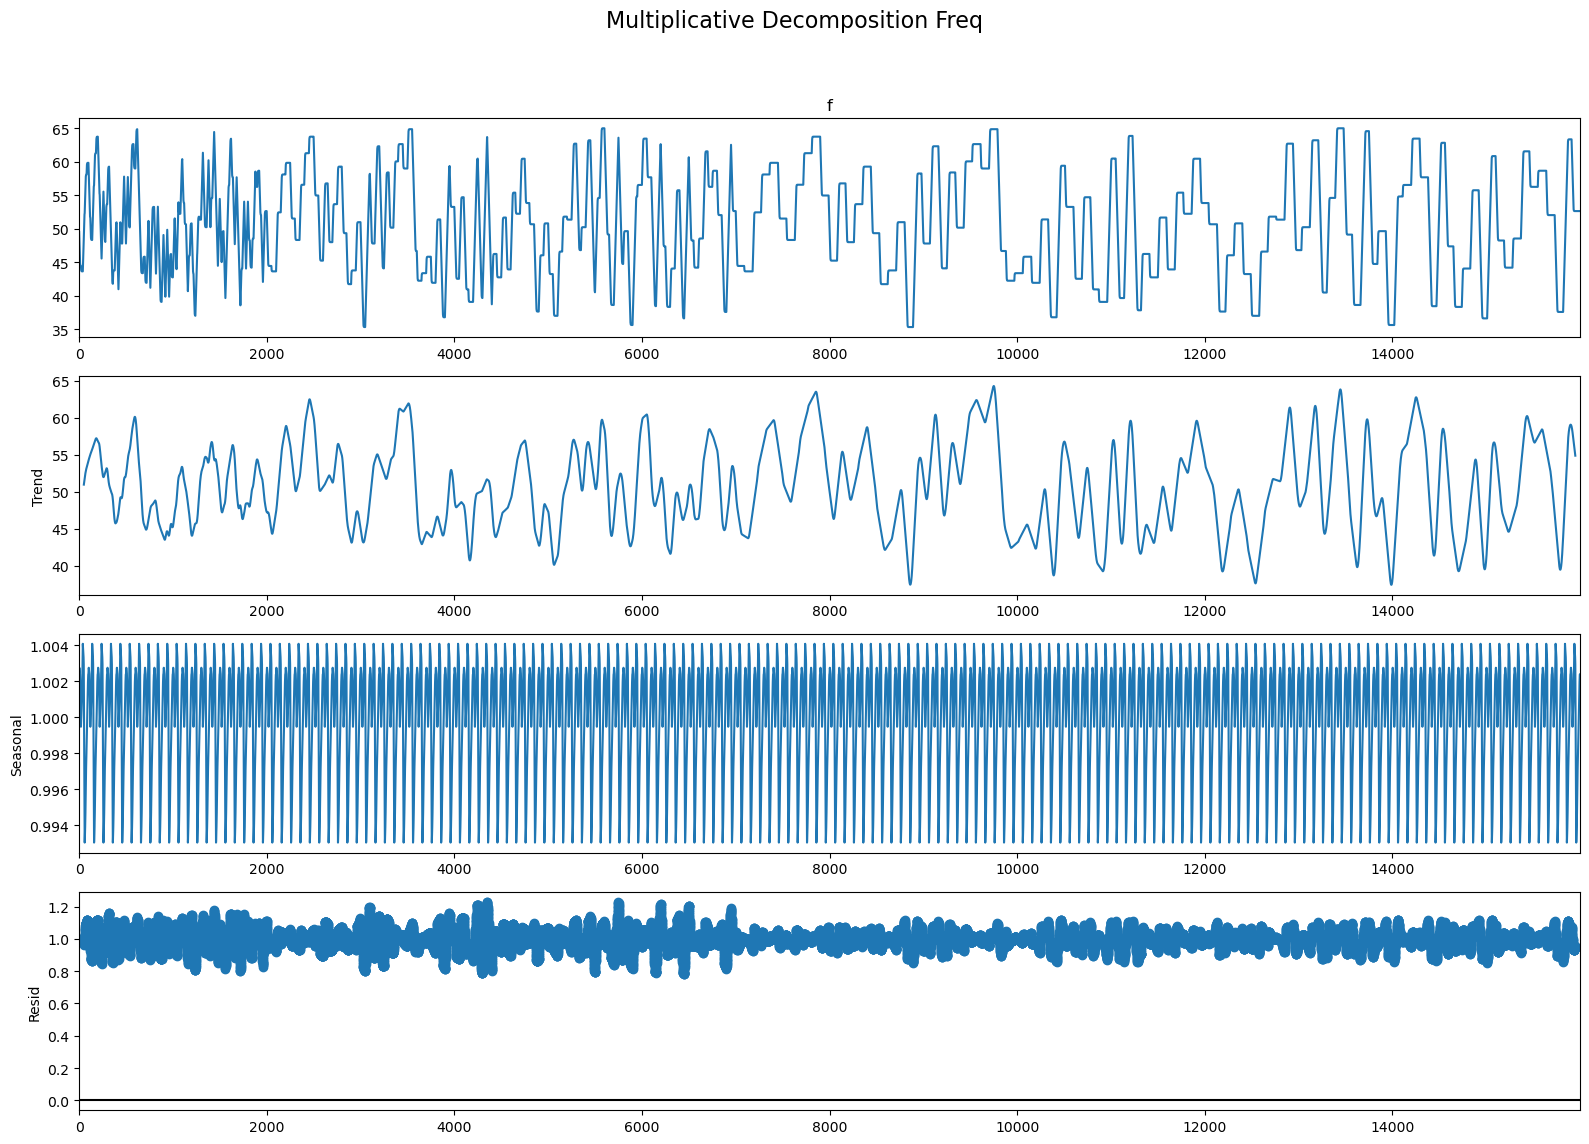

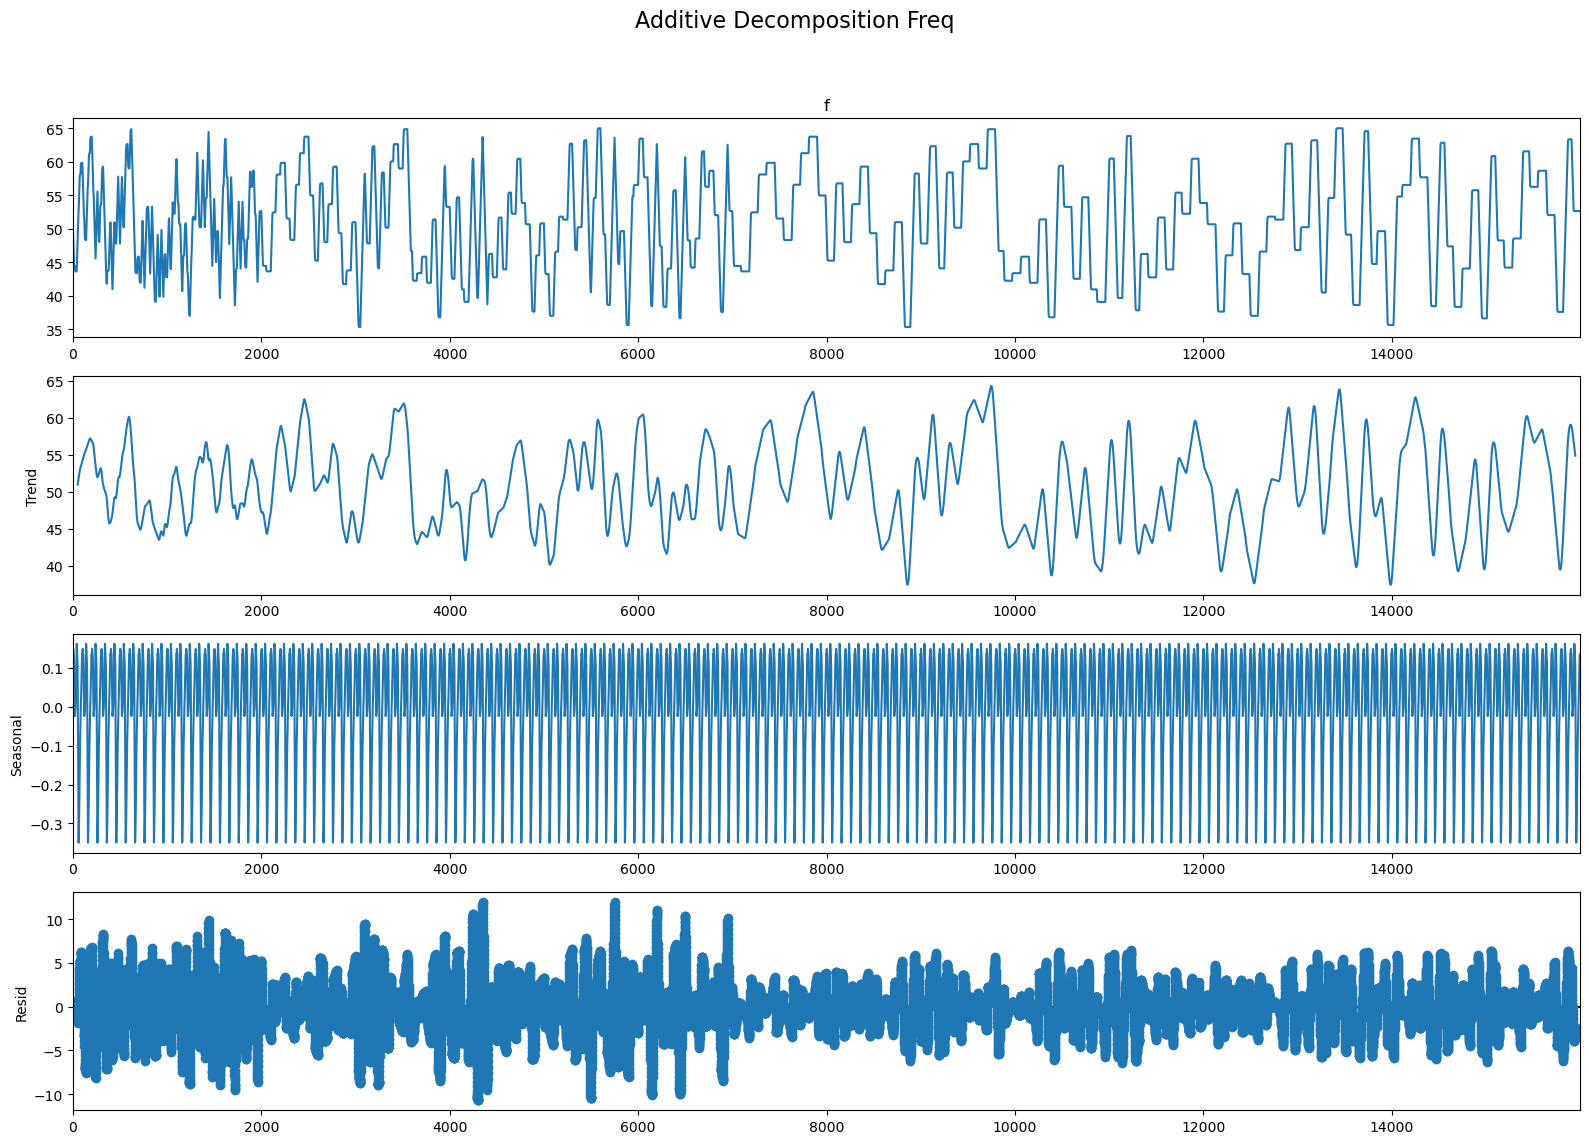

In [16]:
# Multiplicative Decomposition 
periodU = 100
multiplicative_decomposition = seasonal_decompose(df['f'], model='multiplicative', period=periodU)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['f'], model='additive', period=periodU)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition Freq', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition Freq', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

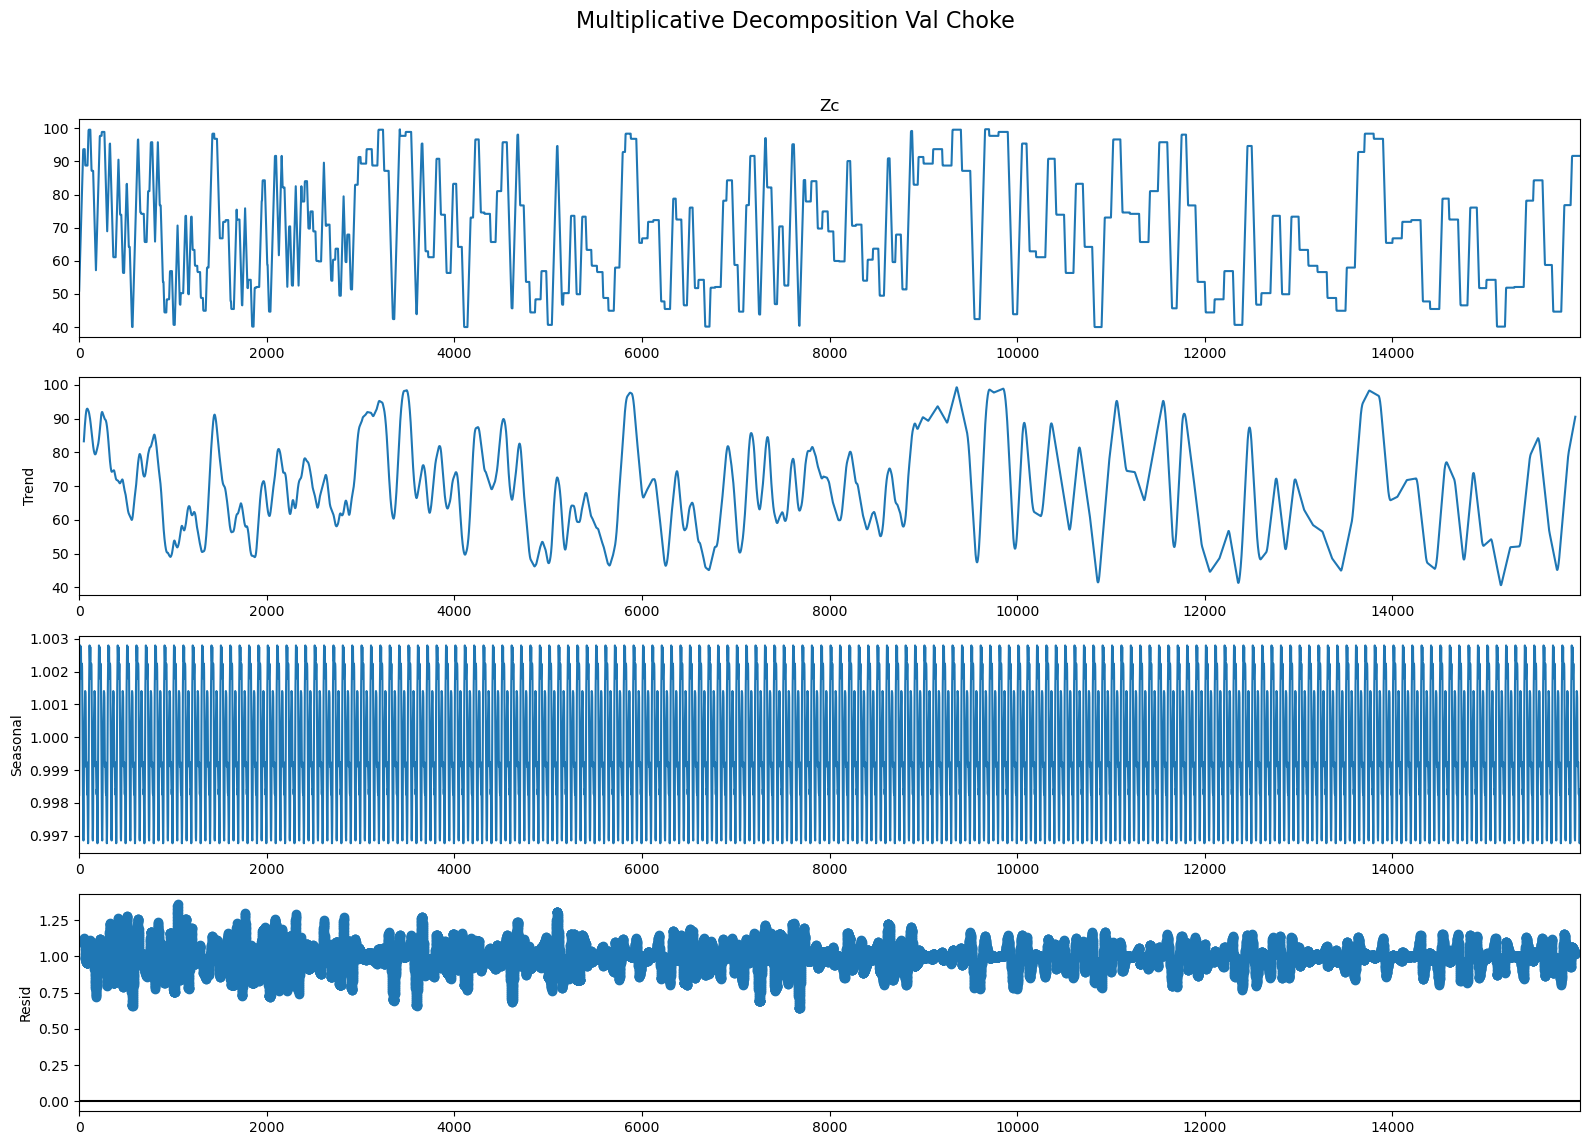

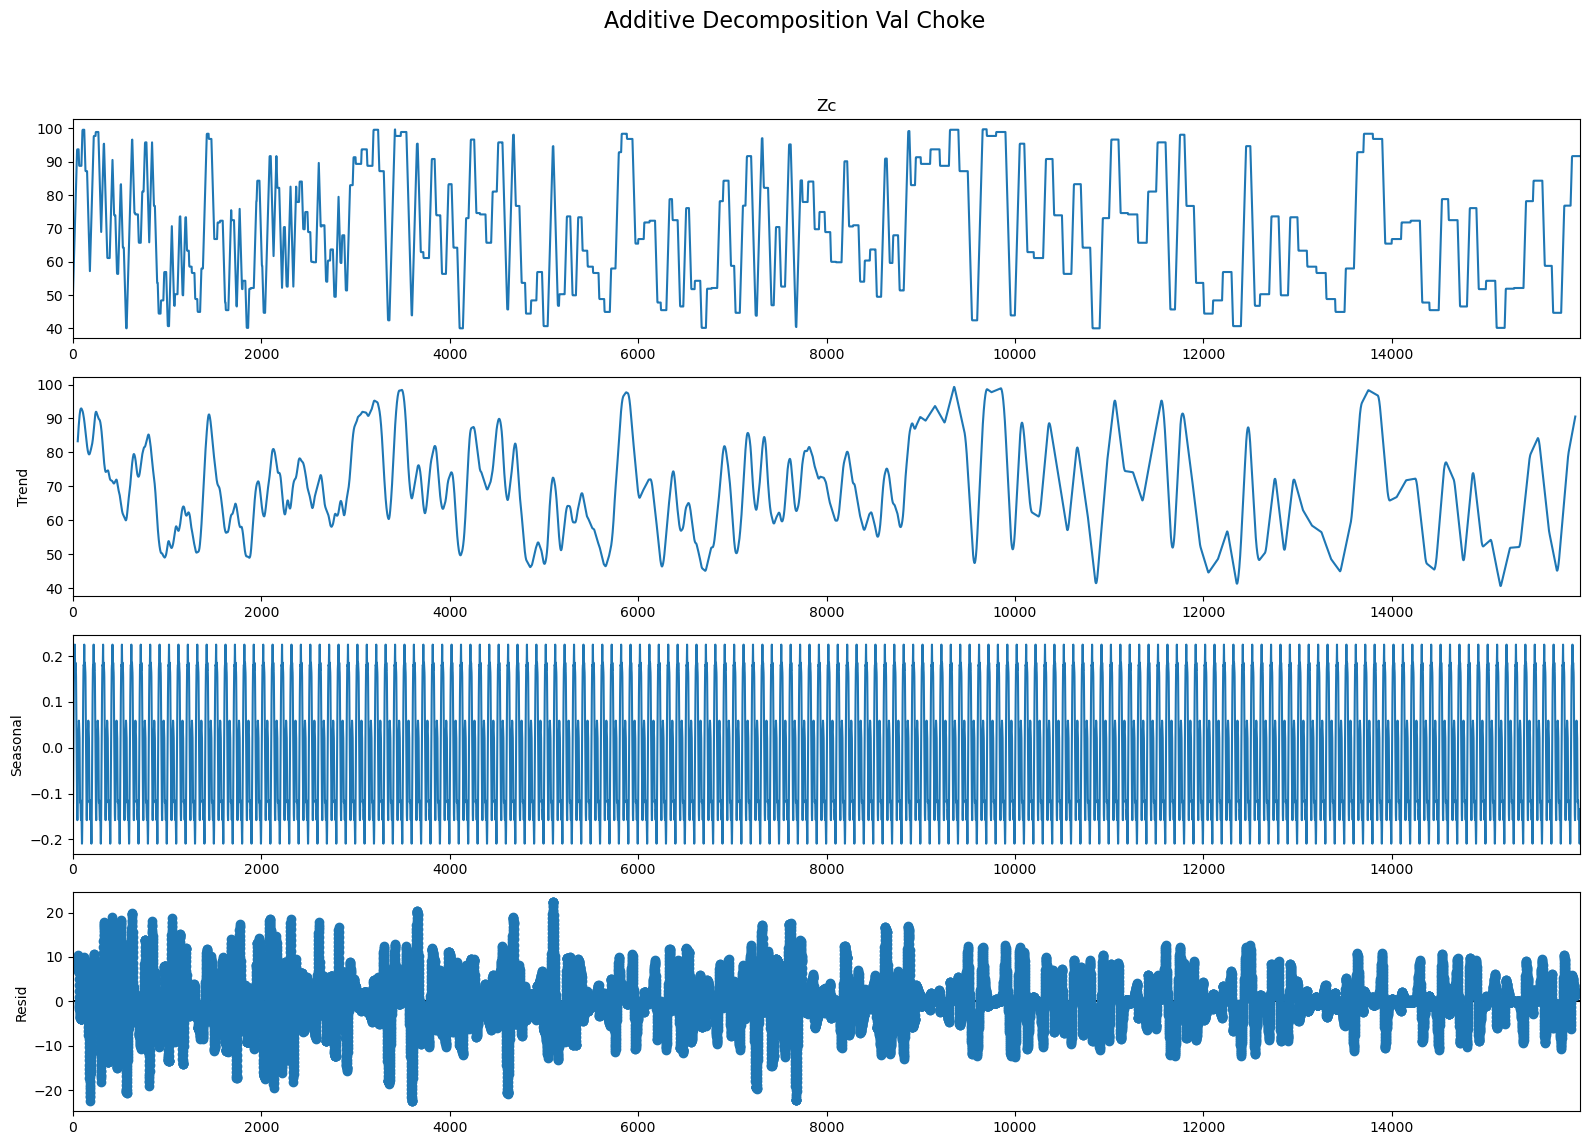

In [17]:
# Multiplicative Decomposition 
periodU = 100
multiplicative_decomposition = seasonal_decompose(df['Zc'], model='multiplicative', period=periodU)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Zc'], model='additive', period=periodU)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition Val Choke', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition Val Choke', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

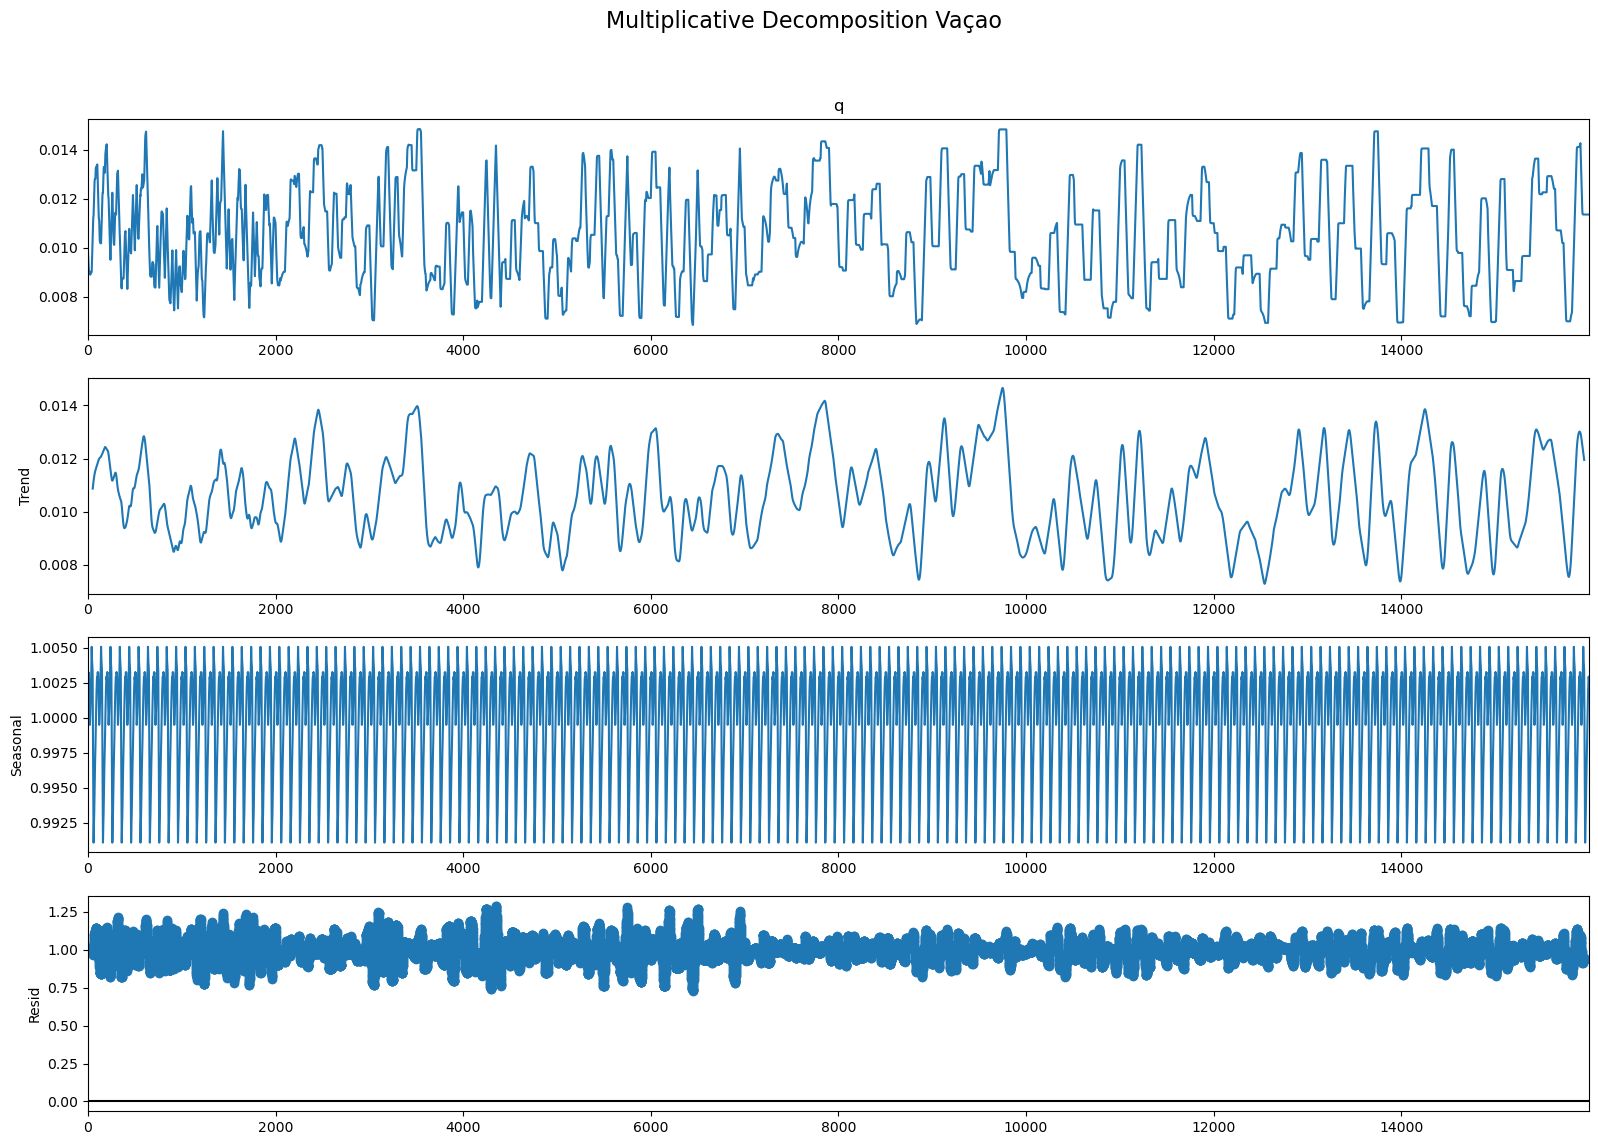

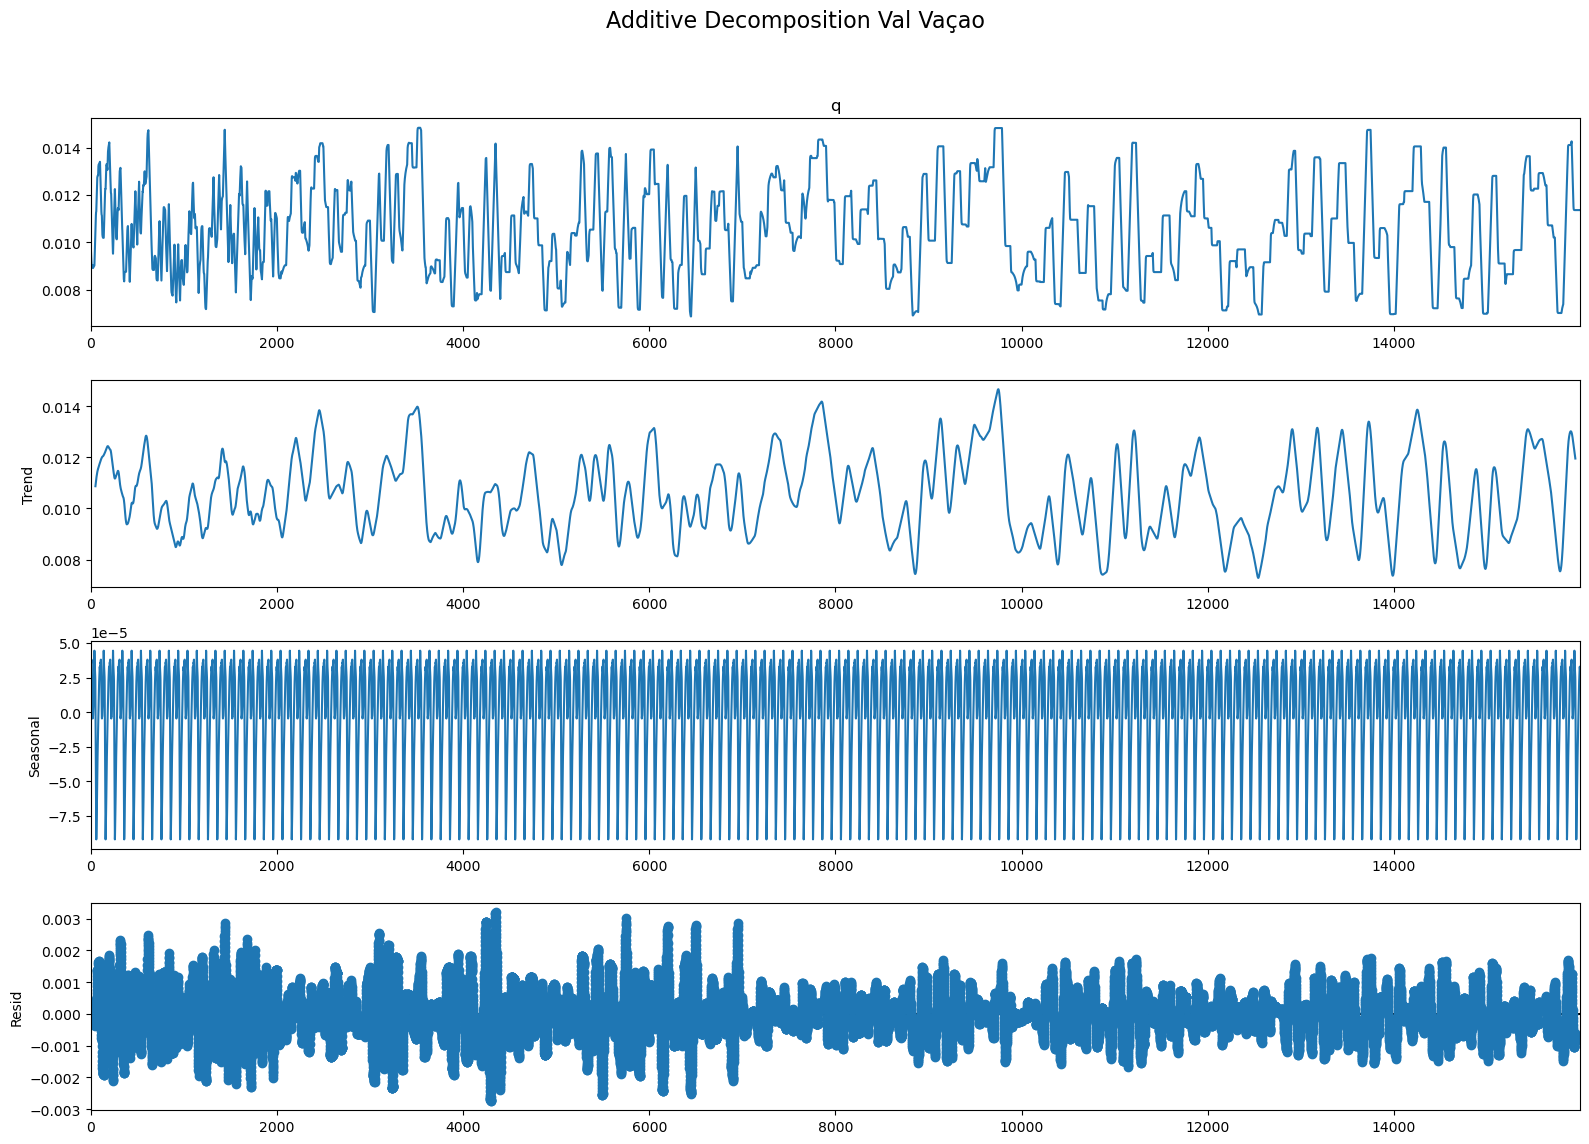

In [18]:
# Multiplicative Decomposition 
periodU = 100
multiplicative_decomposition = seasonal_decompose(df['q'], model='multiplicative', period=periodU)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['q'], model='additive', period=periodU)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition Vaçao', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition Val Vaçao', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<tf.Tensor: shape=(5, 8000), dtype=float64, numpy=
array([[4.94517428e+01, 4.89517428e+01, 4.84517428e+01, ...,
        5.26234094e+01, 5.26234094e+01, 5.26234094e+01],
       [6.88736732e+01, 6.88736731e+01, 6.88736731e+01, ...,
        9.16814485e+01, 9.16814485e+01, 9.16814485e+01],
       [1.02250351e-02, 1.00990905e-02, 9.97363378e-03, ...,
        1.13589686e-02, 1.13589686e-02, 1.13589686e-02],
       [5.78162570e+06, 5.86518658e+06, 5.91772310e+06, ...,
        5.27053440e+06, 5.27338964e+06, 5.29461234e+06],
       [5.68841102e+02, 5.58913781e+02, 5.50395878e+02, ...,
        6.33563449e+02, 6.32545997e+02, 6.33048467e+02]])>

Detrend a Time Series

Text(0.5, 1.0, 'f detrended by subtracting the least squares fit')

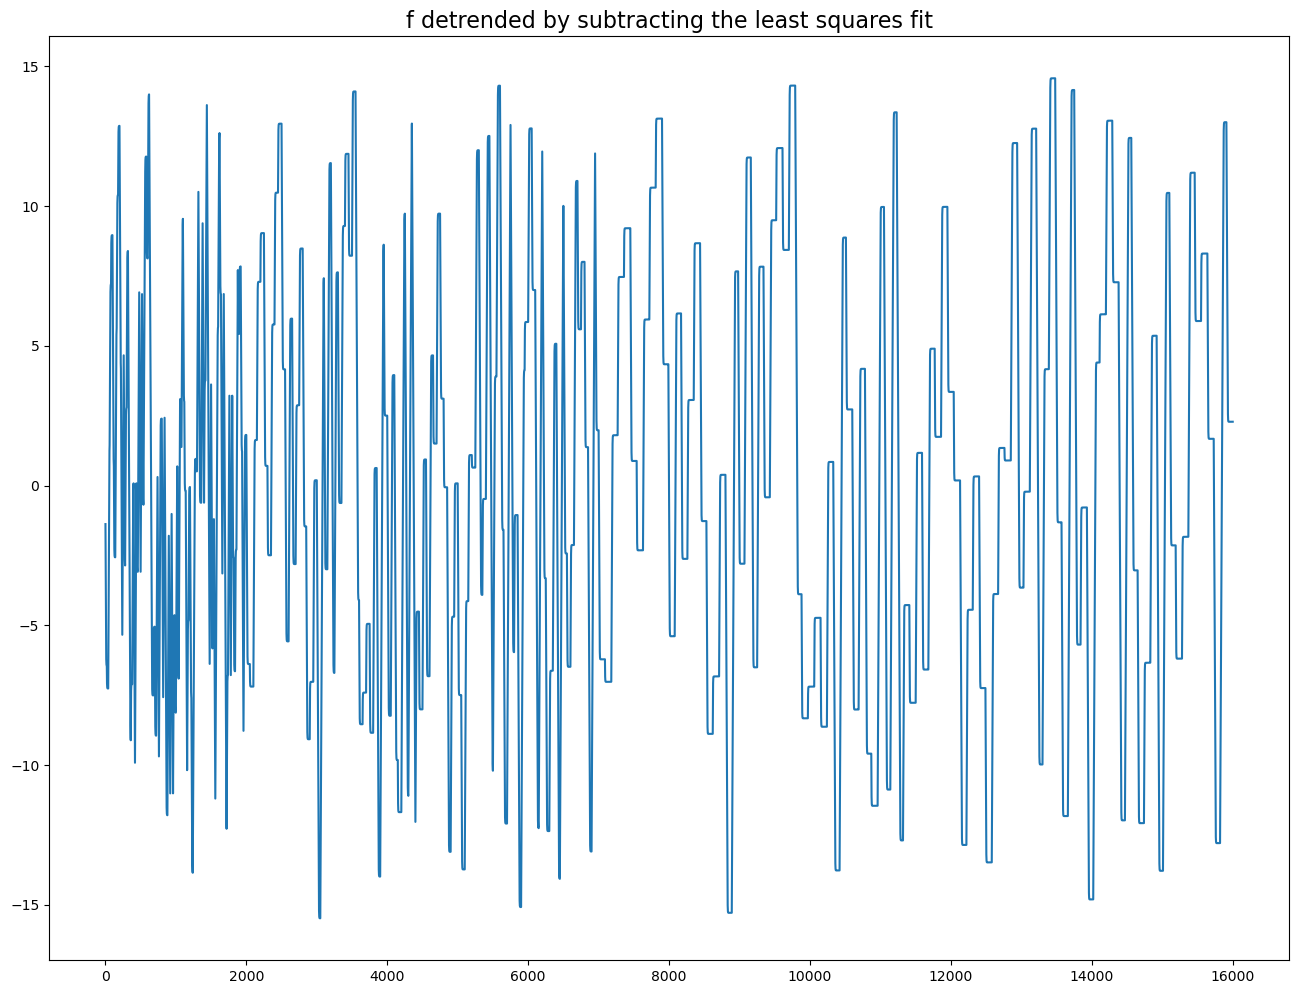

In [20]:
detrended = signal.detrend(df['f'].values)
plt.plot(detrended)
plt.title('f detrended by subtracting the least squares fit', fontsize=16)

Deseasonalize a Time Series

[]

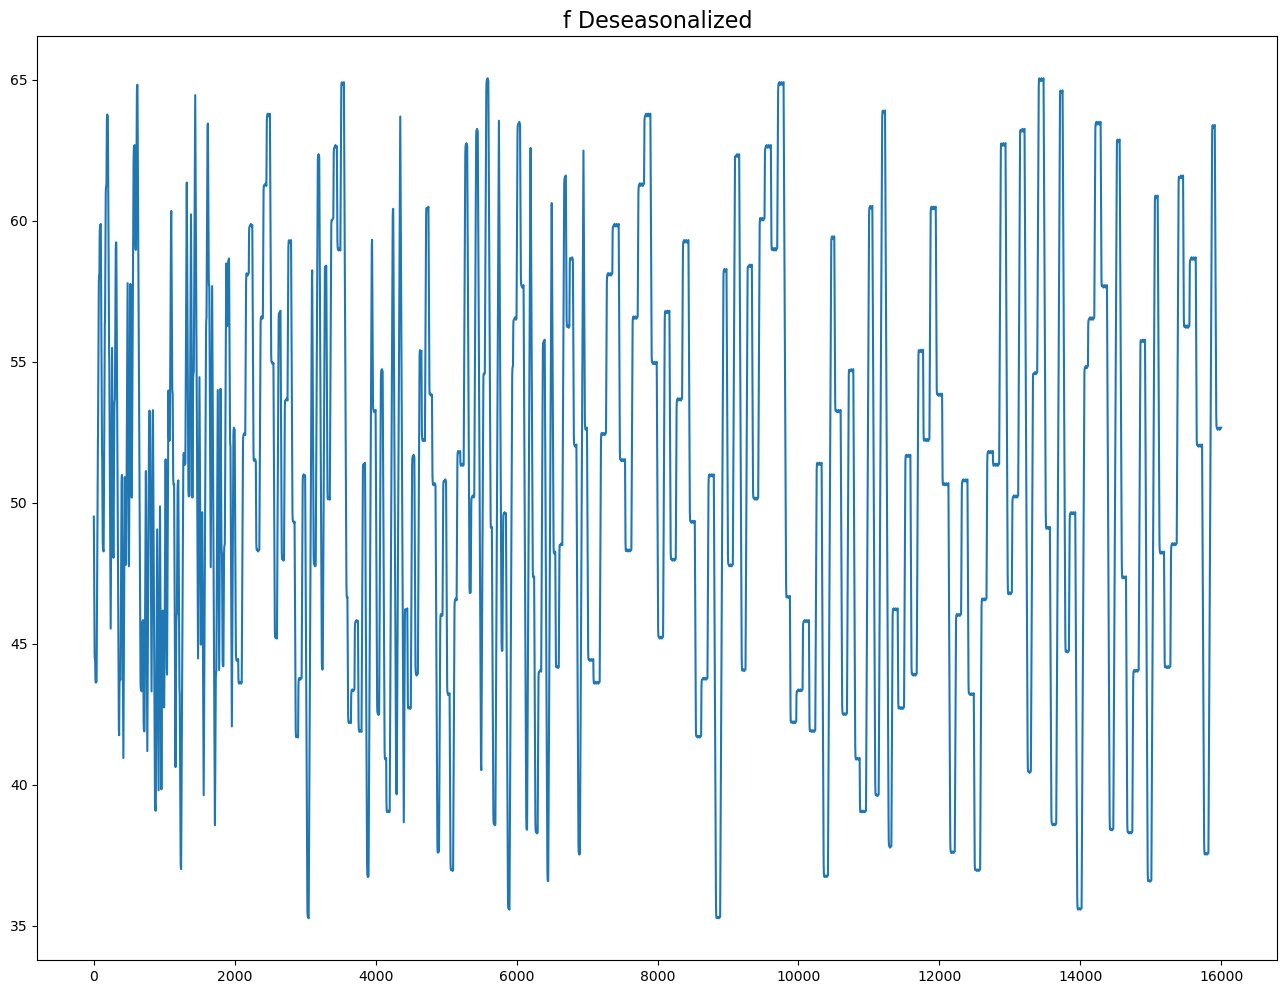

In [21]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['f'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['f'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('f Deseasonalized', fontsize=16)
plt.plot()

How to test for seasonality of a time series? 

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

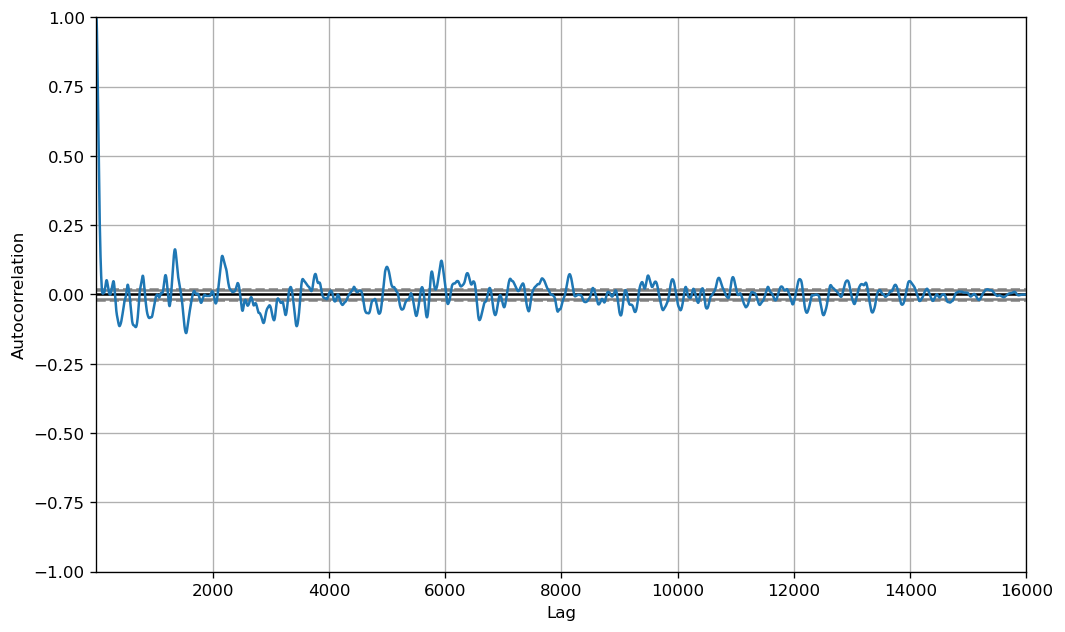

In [22]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['f'].tolist())

Autocorrelation and Partial Autocorrelation Functions 

C:\Users\Solorboy\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


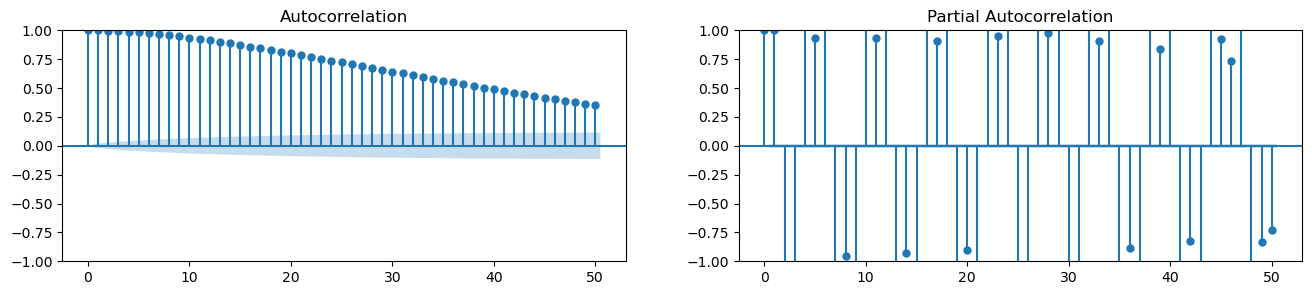

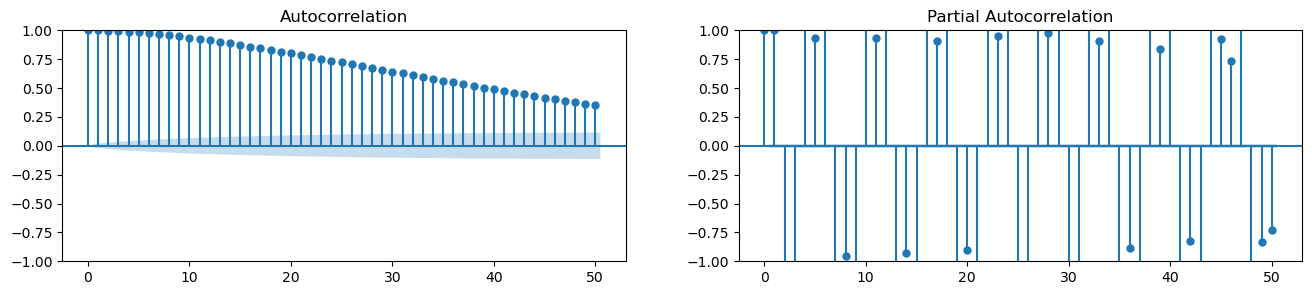

In [23]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['f'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['f'].tolist(), lags=50, ax=axes[1])

Lag Plots

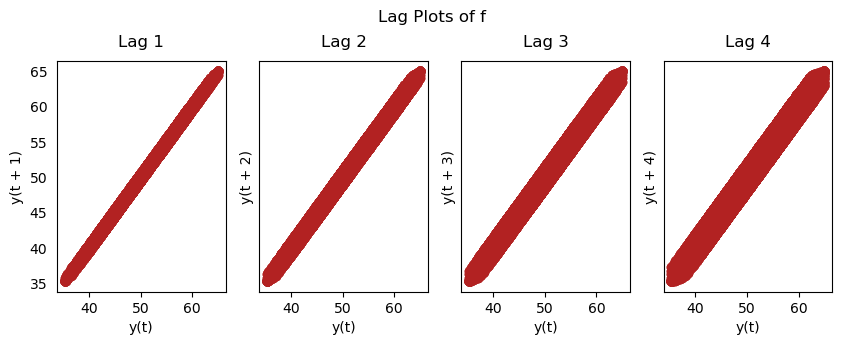

In [24]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['f'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of f', y=1.05)    
plt.show()

Granger Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('/kaggle/input/dataset/dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)

